In [1]:
import numpy as np
import sklearn
import pandas as pd

Next up in Cal's educational mission of assuring our student body that they aren't just numbers, we will examine a dataset of high school students and model their entire livelihoods using Multi-Layer Perceptrons (MLPs)! In this assignment, we will understand the basic function of and intuition behind the MLP, including the form of inputs/outputs, the feedforward mechanism, its ability to perform classification, and the prebuilt industry-standard package `sklearn`. The dataset stored in `students` is from two high schools in Portugal with information on student grades in Math in addition to demographic, social and school related features. Let us first examine the features available to us and their types.


In [2]:
students = pd.read_csv("sample_data/student-mat.csv", sep=";")

students.head()

students = students[students["G3"] != 0]

## Q1 Data Preprocessing
As you can see the dataset contains a number of different columns, some being numeric and others being qualitative. However, because neural networks only take quantitative inputs, we will need all of the columns to be numeric. You will do this through a method called 'one hot encoding,' which involves taking qualitative columns with n different possible options and splitting them into n different columns. If the original column has a certain value, the value for that column will be "1" and the value in the other n-1 columns will be "0". **Modify the dataset so each of the qualitative columns are one-hot encoded by filling in the function `oneHotEncode`.**

In [3]:
def oneHotEncode(df, colName):
  
  #TODO
  unique = df[colName].unique()
  for newCol in unique:
    df[newCol] = df[colName] == newCol
  df = df.replace(False, 0)
  df = df.replace(True, 1)
  df = df.drop(columns=[colName])
  #END TODO

  return df



needToEncode = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", 
                "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
for col in needToEncode:
  students = oneHotEncode(students, col)

students.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GP,MS,F,M,U,R,GT3,LE3,A,T,at_home,other,services,teacher,course,home,reputation,mother,father,yes,no
0,18,4,4,2,2,0,4,3,4,1,1,0.0,6,5,6,6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,17,1,1,1,2,0,5,3,3,1,1,0.0,4,5,5,6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,15,1,1,1,2,3,4,3,2,2,3,0.0,10,7,8,10,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,15,4,2,1,3,0,3,2,2,1,1,0.0,2,15,14,15,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,16,3,3,1,2,0,4,3,2,1,2,0.0,4,6,10,10,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


## Q2 Train Test Split
Next, the data must be split into "training data" and "test data." Do so with df.sample(), splitting the data into 80% training and 20% test data sets. 

In [4]:
#TODO
students_copy = students.copy()
training = students_copy.sample(frac=.8, random_state=0)
test = students_copy.drop(training.index)


Next,  the data must be split into *X* and *Y* values, both for the training and test data sets. In this case the Y values are the columns "G1", "G2", and "G3" and the X values are all other columns. Then, the pandas dataframes must be converted into numpy arrays so they can be manipulated with linear algebra. 




In [5]:
#TODO

X_train = training.drop(columns=["G1", "G2", "G3"])
X_test = test.drop(columns=["G1", "G2", "G3"])
y_train = training[['G1', 'G2', 'G3']]
y_test = test[["G1", "G2", "G3"]]

#END TODO

X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

Run this cell as a sanity check, it ensures that the numpy arrays you have created are of the right shape and only contain numerical values.

In [6]:
assert(X_train_np.shape == (286, 34))
assert(not np.isnan(X_train_np).any())
assert(X_test_np.shape == (71, 34) )
assert(not np.isnan(X_test_np).any())
assert(y_train_np.shape == (286, 3))
assert(not np.isnan(y_train_np).any())
assert(y_test_np.shape == (71, 3))
assert(not np.isnan(y_test_np).any())
print("Success!")

Success!


## Q3 Single Neuron
Now you are going to implement your first neural network. A neural network is a collection of neurons, but you are going to start by implementing a single neuron. This neuron must have randomly generated weights that it applies to the numpy array of inputs to generate a single numerical output, as well as a relu nonlinearity function. The weights should be generated with np.random.rand(len(np_array_of_inputs)) and the seed should be set to 10.

In [7]:
def single_neuron(np_array_of_inputs, seed=10):
  #TODO
  np.random.seed(seed=seed)
  weights = np.random.rand(len(np_array_of_inputs))
  result = np_array_of_inputs @ weights
  if result >= 0:
    return result

  #END TODO
  return 0

assert(single_neuron(X_train_np[0,:]) == 24.89683109941306)



## Q4 Linking Neurons
Now that you have a function that acts as a single neuron, try linking that neuron together with more neurons! Fill in the function regression one_layer_network() that links together 100 neurons into a one layer network.


In [8]:
def one_layer_network(np_array_of_inputs):
#TODO
 return np.mean([single_neuron(np_array_of_inputs, seed) for seed in range(100)])
#END TODO

one_layer_network(X_train_np[0,:])

21.883430076874898

## Q5 Multi Layer Network
Now that you have a network with one layer, try linking together three layers into a larger network. Again, this network will not be able to accurately estimate the y values of its inputs as we are not training the network.

In [9]:
def n_layer_network(np_array_of_inputs, n=3):
  #TODO
  layer = np.array([single_neuron(np_array_of_inputs, seed) for seed in range(100)])
  for i in range(n-1):
    layer = np.array([single_neuron(layer, seed) for seed in range(100)])
  #END TODO
  return np.mean(layer)

n_layer_network(X_train_np[0,:], 3)

53630.49684973486

## Q5 Package: sklearn and Classification


The first network from a package you are going to implement is a basic network for classification. Implement the MLP classifier specified at 

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

Currently, the y values of the dataset are numerical and in three columns. However, we want to be able to make binary classifications about the students, so convert y_train and y_test into 1x(N\*0.8) and 1x(N\*.2) numpy vectors. Create a classifier with two hidden layers of size 100 each that predicts if a student's G3 grade is above or below the average G3 grade (for the whole dataset). Report the percent classification accuracy on the training and test datasets. 



In [10]:
from sklearn.neural_network import MLPClassifier


#TODO

classifier = MLPClassifier(random_state=1, max_iter=30, activation='relu', hidden_layer_sizes=(100, 100))
mean_score = (y_train_np[:,2].sum() + y_test_np[:,2].sum()) / (y_train_np[:,2].shape[0] + y_test_np[:,2].shape[0])
y_train_class = (y_train_np[:,2] > mean_score).astype(int)
y_test_class = (y_test_np[:,2] > mean_score).astype(int)
classifier.fit(X_train_np, y_train_class)

#END TODO


print("test accuracy is", np.mean(classifier.predict(X_test_np) == y_test_class))
print("train accuracy is", np.mean(classifier.predict(X_train_np) == y_train_class))


test accuracy is 0.6056338028169014
train accuracy is 0.7167832167832168


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Q6 Iterations vs Accuracy
Now, we're going to investigate the effect of the number of iterations on the training and test accuracy. In increments of two, plot the train and test accuracy vs the number of iterations, between one and five hundred iterations. Label the axes and provide a key.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


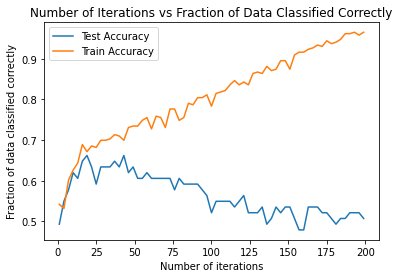

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def report_training_and_test_accuracy(max_iter):
  classifier = MLPClassifier(random_state=1, max_iter=max_iter, activation='relu', hidden_layer_sizes=(100, 100))
  mean_score = (y_train_np[:,2].sum() + y_test_np[:,2].sum()) / (y_train_np[:,2].shape[0] + y_test_np[:,2].shape[0])
  y_train_class = (y_train_np[:,2] > mean_score).astype(int)
  y_test_class = (y_test_np[:,2] > mean_score).astype(int)
  classifier.fit(X_train_np, y_train_class)
  return np.mean(classifier.predict(X_test_np) == y_test_class), np.mean(classifier.predict(X_train_np) == y_train_class)

xs = np.arange(1, 200, 3)
accuracy = [report_training_and_test_accuracy(x) for x in xs]
ys_test = [index[0] for index in accuracy]
ys_train = [index[1] for index in accuracy]

import warnings
warnings.filterwarnings("ignore")

plt.plot(xs, ys_test, label="Test Accuracy")
plt.plot(xs, ys_train, label="Train Accuracy")
plt.xlabel("Number of iterations")
plt.ylabel("Fraction of data classified correctly")
plt.title("Number of Iterations vs Fraction of Data Classified Correctly")
plt.legend()

## Q7 Package: sklearn and Regression

Now you will implement a MLP that performs regression rather than classification. Create numpy arrays y_train_regress and y_test_regress, being 1x(N\*0.8) and 1x(N\*.2) numpy vectors of the student's G3 grade, then use the MLP regressor specified at

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

to train the network to predict student's scores. Report the error on the training and test datasets. 

test squared error is 8.400111194123003
train squared error is 7.48857390779203


Text(0, 0.5, "Students' MLP-predicted grades")

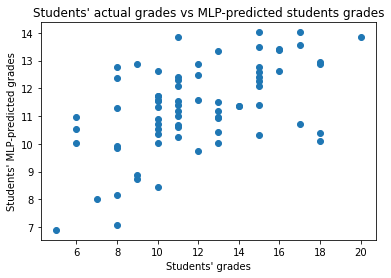

In [12]:
from sklearn.neural_network import MLPRegressor


#TODO
y_train_regress = y_train_np[:,2]
y_test_regress = y_test_np[:,2]
regressor = MLPRegressor(random_state=1, max_iter=300).fit(X_train_np, y_train_regress)

print("test squared error is", ((regressor.predict(X_test_np) - y_test_regress)**2).mean())
print("train squared error is", ((regressor.predict(X_train_np) - y_train_regress)**2).mean())

plt.scatter(y_test_regress, regressor.predict(X_test_np))
plt.title("Students' actual grades vs MLP-predicted students grades")
plt.xlabel("Students' grades")
plt.ylabel("Students' MLP-predicted grades")